<a href="https://colab.research.google.com/github/diane1998/DOLE-EDA/blob/master/DOLE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://www.dole.gov.ph/">Department of Labor and Empployment (DOLE)</a> 

## Background
- Makes sure (Philippine & Global) labor standards are met by their corresponding employers
- Protection of overseas Filipino workers 
- Generally, is in charge of handling any labor issues regarding Filipinos


# Website Journey
## 1. Home Page <br>
![alt text](https://drive.google.com/uc?id=16LhqVv6ckOMqx4i8n22OaDTjpXPK67C8)
## 2. Updates Archieve
![alt text](https://drive.google.com/uc?id=12J5D_scSUX5s-ON0R2No0J8d0Gzt_vG2)
## 3. Article View

# Data Cleaning
The DOLE Website consists of news articles(events that recently happened) and updates(local and regional job updates):
## **Task 1:** We can scrape website and get all updates 
### 1. Regional and overseas updates: 
      - consists of labor-related anouncements, such as wanted jobs for a specific country and wage raise for a specific job
### 2. Put the scraped data into a dataframe (updates_df)
### 3. Extracting more features from the title (feature extraction)
      - Spliting the date column to month, day and year
      - Extracting countries from the article title (segration local and international updates)
      - Extracting jobs in the article title (occupation-related updates)
      - A column that denotes whether the title is in Filipino or English
### 4. Extracting more features from the link (feature extraction)
      - extract the list of reaction/s of the updates article 
      - extract the number of views the updates article had 

# Exploratory Data Analysis
## **Task 2:** Use nltk's count vectorizer to find the most common words for regional and overseas updates and anlyze the relationship between the words
- Plot the most highest frequency of words 

## **Task 3:** Answering some questions
1. Do alot of people visit the dole if website? if so does the majority read the articles?
2. Do people use the react on the artcle? What is the most reacted updates article? and are there any relationship with the reaction? 
3. Are majority of the updates local or does the majority relates to other country? 
4. Are cliches true? What kind of jobs are offered to filipinos? (hypthesis: nurse and domestic helpers)


In [16]:
! pip install pycountry
! pip install langdetect

In [17]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular import * 
import numpy as np
from tqdm import trange # to check the status of the loop
from tqdm import tqdm_notebook as tqdm
from time import sleep 
from bs4 import BeautifulSoup
import pandas as pd # for dataframes
import pycountry # extracting the country from a text
from sklearn.feature_extraction.text import CountVectorizer 
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# You will have to download the set of stop words the first time


import seaborn as sns
sns.set_style("darkgrid")


#news archive
page = requests.get("https://www.dole.gov.ph/regional-and-overseas-updates/") # Download the page using requests
soup = BeautifulSoup(page.content, 'html.parser') # Create a BeautifulSoup object

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
print(soup.prettify()) # Pretify the html to show how it would look like with proper indents

<!DOCTYPE html>
<html class="no-js" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Regional and Overseas Updates | Department of Labor and Employment
  </title>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://www.dole.gov.ph/wp-content/themes/gwt-wordpress-25.0/favicon.ico" rel="icon"/>
  <link href="//www.google.com" rel="dns-prefetch">
   <link href="//s.w.org" rel="dns-prefetch">
    <link href="https://www.dole.gov.ph/feed/" rel="alternate" title="Department of Labor and Employment » Feed" type="application/rss+xml"/>
    <link href="https://www.dole.gov.ph/comments/feed/" rel="alternate" title="Department of Labor and Employment » Comments Feed" type="application/rss+xml"/>
    <!-- This site uses the Google Analytics by MonsterInsights plugin v7.10.4 - Using Analytics tracking - https://www.monsterinsights.com/ -->
    <script data-cfasync="false" type="text/javascri

In [19]:
# TASK 1:
# Get the class where the update date and update title is in
from langdetect import detect 
print(soup.find_all(class_="news-content")) ## print all the news content



#getting details of the title:
def extract_details(df,index,count):

  for x in soup.find_all(class_="news-content"): 
    added = False
    data_row = []
    data_row.append(x.find(class_="grid-date-post").get_text().strip()) #get the date of each article
    for child in x.find(class_="news-title").children: # get the children
      data_row.append(child.get_text()) # get the text
      data_row.append(child.get('href')) # get the link 
      # get the country of the text
      countries = []
      for country in pycountry.countries:
        if country.name in child.get_text():
          countries.append(country.name)
      #in case the title has more than one country
      if len(countries) == 0:
        data_row.append("None")
      elif len(countries) ==1:
        data_row.append(countries[0])
      else :
        listToStr = ','.join([str(elem) for elem in countries])
        data_row.append(listToStr)
      
      data_row.append(detect(child.get_text()))

    df.loc[count] =  data_row
    count += 1
  return df
  

[<div class="news-content">
<div class="grid-date-post">        			
							November 27, 2019                    
							                    
													</div>
<div class="post-content-text">
<h3 class="news-title"><a href="https://www.dole.gov.ph/news/more-pinoy-nurses-wanted-in-germany/" rel="bookmark">More Pinoy nurses wanted in Germany</a></h3>
</div>
</div>, <div class="news-content">
<div class="grid-date-post">        			
							November 5, 2019                    
							                    
													</div>
<div class="post-content-text">
<h3 class="news-title"><a href="https://www.dole.gov.ph/news/beware-of-job-ads-using-fake-poea-fb/" rel="bookmark">Beware of job ads using fake POEA FB</a></h3>
</div>
</div>, <div class="news-content">
<div class="grid-date-post">        			
							July 30, 2019                    
							                    
													</div>
<div class="post-content-text">
<h3 class="news-title"><a href="https://www.dole.gov.ph/news/charging-training

In [20]:
# Task 1: Converting the scraped data into a dataframe

updates_df = pd.DataFrame(columns=["date","title","link","country","language"]) 
#tqdm to see the status of the loop
for counter in trange(1,97): # go through all the pages of the updates (max page was 96) used
  sleep(0.1)
  if(counter==1):
    link =  "https://www.dole.gov.ph/regional-and-overseas-updates/"
  else:
    link =  "https://www.dole.gov.ph/regional-and-overseas-updates/page/"+str(counter)+"/"
  page = requests.get(link) # Download the page using requests
  soup = BeautifulSoup(page.content, 'html.parser')
  updates_df = extract_details(updates_df,soup,(counter-1)*15) # counter for the index of which row the data should be added
  #temp_df = updates_df

100%|██████████| 96/96 [02:22<00:00,  1.48s/it]


In [21]:
updates_df['country'].unique()

array(['Germany', 'None', 'Japan', 'Thailand', ..., 'Italy', 'Cyprus', 'Guinea,Libya,Papua New Guinea', 'Algeria'],
      dtype=object)

# Adding Day Month and Year from ```Date``` column

In [22]:
add_datepart(updates_df,"date") 

,title,link,country,language,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,More Pinoy nurses wanted in Germany,https://www.dole.gov.ph/news/more-pinoy-nurses...,Germany,en,2019,11,48,27,2,331,False,False,False,False,False,False,1574812800
1,Beware of job ads using fake POEA FB,https://www.dole.gov.ph/news/beware-of-job-ads...,None,en,2019,11,45,5,1,309,False,False,False,False,False,False,1572912000
2,Charging training fees for Japan interns illegal,https://www.dole.gov.ph/news/charging-training...,Japan,en,2019,7,31,30,1,211,False,False,False,False,False,False,1564444800
3,Deployment of Pinoy teachers in Thailand soon,https://www.dole.gov.ph/news/deployment-of-pin...,Thailand,en,2019,4,14,7,6,97,False,False,False,False,False,False,1554595200
4,DOLE orders probe of OFW abuse in Jeddah,https://www.dole.gov.ph/news/dole-orders-probe...,None,en,2019,4,14,6,5,96,False,False,False,False,False,False,1554508800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,DOLE-RO 8 launches new website,https://www.dole.gov.ph/news/dole-ro-8-launche...,None,en,2010,8,31,3,1,215,False,False,False,False,False,False,1280793600
1430,"DOLE 1 deploys staff, creates 2 additional fie...",https://www.dole.gov.ph/news/dole-1-deploys-st...,None,en,2010,8,31,3,1,215,False,False,False,False,False,False,1280793600
1431,Orientation on alien employment regulations he...,https://www.dole.gov.ph/news/date-posted-augus...,None,en,2010,8,31,3,1,215,False,False,False,False,False,False,1280793600
1432,W. Visayas to intensify inspection,https://www.dole.gov.ph/news/w-visayas-to-inte...,None,en,2010,8,31,3,1,215,False,False,False,False,False,False,1280793600


In [23]:
updates_df.describe()

,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1.434000e+03
mean,2013.843096,6.156206,25.024407,15.553696,2.211297,171.700837,1.398322e+09
std,2.118884,3.403644,14.842700,8.790195,1.574610,103.900056,6.586611e+07
min,2010.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.280794e+09
25%,2012.000000,3.000000,12.000000,8.000000,1.000000,79.000000,1.338876e+09
50%,2014.000000,6.000000,24.000000,15.000000,2.000000,164.000000,1.400458e+09
75%,2015.000000,9.000000,38.000000,23.000000,4.000000,263.000000,1.442470e+09
max,2019.000000,12.000000,53.000000,31.000000,6.000000,364.000000,1.574813e+09


### Observation 1: Duplicates
- As we can see below, there are several article titles that were repeated, so we should delete duplicates in the dataframe
![alt text](https://drive.google.com/uc?id=1fhO-CiqDvh4ZGahE-ADVeDW1IhCn4GLy)
 - 15 rows was removed


**note: I manually checked  3 duplicate update titles in the DOLE website, I found that the even though the title is equivalant the links are not equavalent. as seen in the table below, however the all had the same content. Thus concluding that duplicates should be dropped**



| link                                                                                          | title                                                         |
|-----------------------------------------------------------------------------------------------|---------------------------------------------------------------|
| https://www.dole.gov.ph/news/victims-of-collapsed-bunkhouse-in-cebu-to-receive-ec-benefits/   | VICTIMS OF COLLAPSED BUNKHOUSE IN CEBU TO RECEIVE EC BENEFITS |
| https://www.dole.gov.ph/news/victims-of-collapsed-bunkhouse-in-cebu-to-receive-ec-benefits-2/ | VICTIMS OF COLLAPSED BUNKHOUSE IN CEBU TO RECEIVE EC BENEFITS |
| https://www.dole.gov.ph/news/victims-of-collapsed-bunkhouse-in-cebu-to-receive-ec-benefits-3/ | VICTIMS OF COLLAPSED BUNKHOUSE IN CEBU TO RECEIVE EC BENEFITS |

In [24]:
display(updates_df.iloc[43:50,:])
updates_df = updates_df.drop_duplicates(subset=['title']).reset_index(drop= True) # remove duplicate titles
updates_df.describe()

,title,link,country,language,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
43,"Mga naghahanap ng trabaho, nadaya ng pekeng em...",https://www.dole.gov.ph/news/mga-naghahanap-ng...,None,tl,2018,3,12,20,1,79,False,False,False,False,False,False,1521504000
44,Fake email of PH Embassy in London dupes jobse...,https://www.dole.gov.ph/news/fake-email-of-ph-...,None,en,2018,3,12,20,1,79,False,False,False,False,False,False,1521504000
45,Victims of collapsed bunkhouse in Cebu to rece...,https://www.dole.gov.ph/news/victims-of-collap...,None,en,2018,3,12,20,1,79,False,False,False,False,False,False,1521504000
46,Victims of collapsed bunkhouse in Cebu to rece...,https://www.dole.gov.ph/news/victims-of-collap...,None,en,2018,3,12,20,1,79,False,False,False,False,False,False,1521504000
47,Victims of collapsed bunkhouse in Cebu to rece...,https://www.dole.gov.ph/news/victims-of-collap...,None,en,2018,3,12,20,1,79,False,False,False,False,False,False,1521504000
48,Oman suspends issuance of visas for certain jobs,https://www.dole.gov.ph/news/oman-suspends-iss...,Oman,en,2018,3,12,20,1,79,False,False,False,False,False,False,1521504000
49,Oman suspends issuance of visas for certain jobs,https://www.dole.gov.ph/news/oman-suspends-iss...,Oman,en,2018,3,12,20,1,79,False,False,False,False,False,False,1521504000


,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed
count,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1.415000e+03
mean,2013.822615,6.167491,25.065724,15.498233,2.212721,171.992933,1.397701e+09
std,2.103153,3.402647,14.844476,8.812993,1.575307,103.907252,6.544335e+07
min,2010.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.280794e+09
25%,2012.000000,3.000000,12.000000,8.000000,1.000000,80.000000,1.338422e+09
50%,2014.000000,6.000000,24.000000,15.000000,2.000000,165.000000,1.400198e+09
75%,2015.000000,9.000000,38.000000,23.000000,4.000000,263.000000,1.441454e+09
max,2019.000000,12.000000,53.000000,31.000000,6.000000,364.000000,1.574813e+09


### Observation 2: Tagalog titled articles

-  langdetect library classified tagalog as indonesian and  Estonian , an explantion would be indonesia and Philippine language contain loanwords from sanskrit.

- below we classify the language of the title and manually check the other dialects that langdetect displayed. 

source : https://www.theodysseyonline.com/historical-and-cultural-connections-between-indonesia-and-the-philippines
![alt text](https://drive.google.com/uc?id=1RotKlNg1lw4OHOllyrWaJA4-cTT4CHUp)


In [25]:
print("unique country "+updates_df.country.unique())
print("unique dialects "+updates_df.language.unique())

for language in updates_df.language.unique():
  if(language!='en'):
    print(language)
    for title in updates_df[updates_df["language"]==language]['title']:
      print(title)
    print("[DONE]")
#id et 


fixed_lang = [] 
for lang in updates_df["language"]:
  if(lang == 'id' or lang== 'et' or  lang== 'tl'):
    fixed_lang.append('tl')
  else:
    fixed_lang.append('en')

updates_df["language"] = fixed_lang

print("unique dialects "+updates_df.language.unique())

['unique country Germany' 'unique country None' 'unique country Japan' 'unique country Thailand' ...
 'unique country Italy' 'unique country Cyprus' 'unique country Guinea,Libya,Papua New Guinea' 'unique country Algeria']
['unique dialects en' 'unique dialects de' 'unique dialects af' 'unique dialects nl' 'unique dialects tl'
 'unique dialects id' 'unique dialects pt' 'unique dialects fr' 'unique dialects sl' 'unique dialects it'
 'unique dialects sv' 'unique dialects es' 'unique dialects no' 'unique dialects ca' 'unique dialects ro']
de
DOLE Hotline 1349 ADVISORY
Baldoz unveils marker for DOLE Region 6 Testing and Coaching Center
SENA desks now in Cebu Ecozone – DOLE chief
[DONE]
af
Distressed KSA workers back home
OFWs in Qatar to get workers’ fund
DOLE settles dispute at Lakepower
Palawan workers get P7M aid
847 unpaid workers in Kuwait; More OFWs get help
POLO-Korea briefs 220 new EPS workers on working in Korea
DOLE warns vs illegal EPS workers in Korea
Cordillera wage board grant

### Observation 3: Filipino to english article titles 
- There are some consecutive entries that have the same context, the difference is that the former is in Filipino and the latter is in English

## Process
1. get the index of filipino/tagalog articles and removed indices
2. Got the corresponding english article by getting the next index of each filipino/tagalog article, to compare word intersection the filipino and english titles.
3. Used nltk Bleu to find the word intersection of the filipino update article with a corresponding english intersection
4. Manually removed the article titles that are not equivalent resulted to ```filipino_english_true.csv```
![alt](https://drive.google.com/uc?id=147nHkCjHl5bkzkoRV6LjUnUBKcMj5v6y)


In [26]:
tagalog_english_pairs = []


# get all the tagalog index and when the index are consecutive it means that 
# the tagalog is not equivalent to the next index
print(updates_df[updates_df["language"] =="tl"].index)


tagalog_index = updates_df[updates_df["language"] =="tl"].index.tolist()

equivalence = [] 

for index  in range(len(tagalog_index)):
  to_add = True
  if(index!= len(tagalog_index)-1):
    if(tagalog_index[index+1]== tagalog_index[index]+1):
      to_add = False
  if(to_add):
    equivalence.append(tagalog_index[index])
      

print("length of possible equivalent fil-eng update "+ str(len(equivalence)))

for val in equivalence:
  tagalog_english_pairs.append(val)
  tagalog_english_pairs.append(val+1)

# # tagalog_english_pairs = list( dict.fromkeys(tagalog_english_pairs))
# #manually check
tag_eng_df= updates_df.iloc[tagalog_english_pairs]

stop_words = stopwords.words('english')

# BLEU check the intersection of the english and filipino versions of the title

from nltk.translate.bleu_score import sentence_bleu
scores= []
for x in equivalence:
  english = updates_df["title"][x+1].split()
  tagalog = updates_df["title"][x].split()
  #remove the stop words
  score = sentence_bleu([[word for word in english if word not in stop_words]],tagalog,weights=(1, 0, 0, 0))
  scores.append(score)
  scores.append(score)
  print(score)

tag_eng_df["BLEU1"] =  scores
# this made it easier to check if they are equivalent because some had scores of 0 means they are not equivalent
tag_eng_df.to_csv("filipino_english.csv")

Int64Index([  30,   32,   33,   38,   40,   42,   43,   49,   50,   52,   54,
              58,   59,   60,   63,   65,   68,   70,   72,   73,   76,   77,
              79,   81,   83,   86,   88,   91,   92,   93,   94,   96,  100,
             103,  105,  106,  109,  110,  116,  118,  120,  122,  128,  131,
             132,  137,  139,  140,  143,  145,  146,  149,  153,  154,  164,
             167,  169,  171,  172,  277,  283,  284,  286,  317,  583,  603,
             693,  781,  844,  873,  923,  930,  982, 1099, 1196, 1197, 1203,
            1272, 1364],
           dtype='int64')
length of possible equivalent fil-eng update 60
0.4
0.14285714285714285
0
0
0.07142857142857141
0.14285714285714285
0.14285714285714285
0.25
0
0
0.3333333333333333
0.3
0.2857142857142857
0
0.45454545454545453
0.2727272727272727
0.25
0.08333333333333333
0.15384615384615385
0.4166666666666667
0.5454545454545454
0.4166666666666667
0.3333333333333333
0.23076923076923078
0
0.13333333333333333
0.3636363636

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

### Observation 4:
- the **link** column has further information we can ulitize like the number of visits and reactions regarding the article. 
- Reactions of the article (blue)
- the number of views (orange)
![alt text](https://drive.google.com/uc?id=1PqAyTBCEWFq4nT16kLOGtBQqGp0hVPc9)

# **NOTE** : warning the code below is very slow we can skip this and just read a csv to save time

In [27]:

def extract_reacts_views(link,emoji_dict,current):
  page = requests.get(link) # Download the page using requests
  soup = BeautifulSoup(page.content, 'html.parser')

  emoji_dict["views"].append(soup.find(class_="page-views").getText()) #number of visits
  #print(soup.find(class_="dw-reactions-count").contents)

  # class that contains all the reactions is with the corresponding count dw-reactions-count
  for x in soup.find(class_="dw-reactions-count").contents:  
    if(x.find("strong")!=-1):
      emoji_dict[x["class"][1]].append(x.getText()) # append text to what kind of react it is
  
  for react in emoji_dict.keys(): # check the length of the array vs the current index to check if there was no entry and add none if nothing was added
    if(len(emoji_dict[react])==current-1):
      emoji_dict[react].append(0)

  return emoji_dict

emoji_dict = {"views":[],"dw-reaction-count-like":[],"dw-reaction-count-love":[],"dw-reaction-count-haha":[],"dw-reaction-count-wow":[],"dw-reaction-count-sad":[],"dw-reaction-count-angry":[]}

index = 1
for link in tqdm(updates_df["link"].to_list()):
  emoji_dict = extract_reacts_views(link,emoji_dict,index)
  index+=1


KeyboardInterrupt: ignored

In [0]:
reacts = pd.DataFrame.from_dict(emoji_dict)
reacts.to_csv("reacts.csv")

# If you want to skip the loop

In [32]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link ="https://drive.google.com/open?id=1oCNiEUfd1a45ApIGcsVDzKCYdQijt5KO"

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('reacts.csv')  
reacts = pd.read_csv('reacts.csv')

#reacts = pd.read_csv("https://drive.google.com/open?id=1oCNiEUfd1a45ApIGcsVDzKCYdQijt5KO")

1oCNiEUfd1a45ApIGcsVDzKCYdQijt5KO


In [0]:
reacts.head()
updates_df = pd.concat([updates_df,reacts],axis=1)

In [0]:
updates_df.to_csv("updates-react.csv")

In [0]:
updates_df = pd.read_csv("updates-react.csv")

In [0]:
updates_df['views'] = updates_df['views'].str.replace(",","")
updates_df['views'] = updates_df['views'].astype(int)

# Analysis 1: Views

## Questions: Do alot of people visit the dole if website? if so does the majority read the articles? 

1.1 Surprisingly Dole Homepage had 4,221,456 and by using the describe function we can observe that the number of views would range from 4,219,613 till  4,236,979 ergo concluding that many people had visited the DOLE website.  </br> 
1.2. if we look at the distribution of views, 1200/1415 or 84.80% of the articles have the same amount of views thus we can conclude that many users read or view majority of DOLE update articles.



Dole Home website had 4,252,550


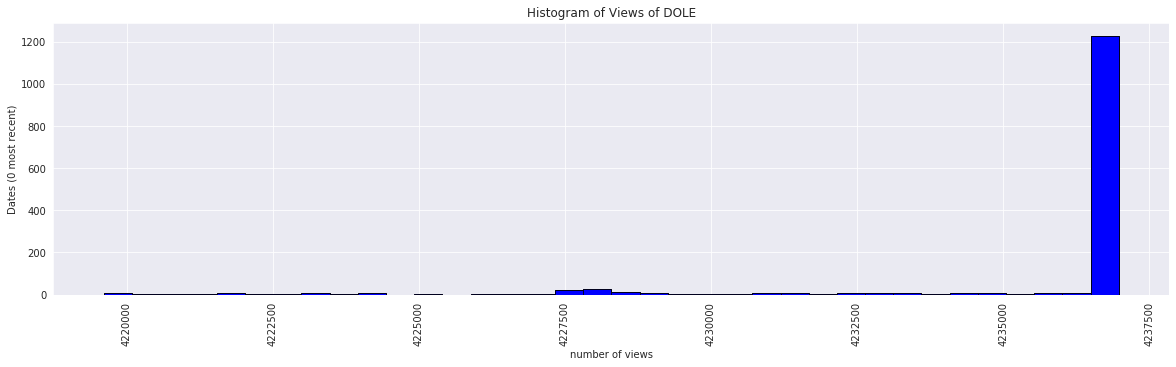

<Figure size 432x288 with 0 Axes>

In [39]:
page = requests.get("https://www.dole.gov.ph/") # Download the page using requests
soup = BeautifulSoup(page.content, 'html.parser')
print("Dole Home website had " + soup.find(class_="page-views").getText())





plt.figure(figsize=(20,5))
# remove comma of strings
#updates_df['views'] = updates_df['views'].str.replace(",","")
#updates_df['views'] = updates_df['views'].astype(int)
# matplotlib histogram
data = updates_df['views']
plt.hist(data, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(data, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of Views of DOLE')
plt.xticks(rotation=90)
plt.xlabel('number of views')
plt.ylabel('Dates (0 most recent)')


plt.show()

plt.savefig("views_distribution.png")


In [66]:

# plt.figure(figsize=(15,8))
# ax = sns.lineplot(x=updates_df.index, y="views",data=updates_df,markers= True)
#updates_df["views"].describe().astype(int)
 updates_df[updates_df['views']<4235001]

,Unnamed: 0,title,link,country,language,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Unnamed: 0.1,views,dw-reaction-count-like,dw-reaction-count-love,dw-reaction-count-haha,dw-reaction-count-wow,dw-reaction-count-sad,dw-reaction-count-angry
0,0,More Pinoy nurses wanted in Germany,https://www.dole.gov.ph/news/more-pinoy-nurses...,Germany,en,2019,11,48,27,2,331,False,False,False,False,False,False,1574812800,0,4221862,4,0,0,0,0,0
1,1,Beware of job ads using fake POEA FB,https://www.dole.gov.ph/news/beware-of-job-ads...,None,en,2019,11,45,5,1,309,False,False,False,False,False,False,1572912000,1,4219759,0,0,0,0,0,0
2,2,Charging training fees for Japan interns illegal,https://www.dole.gov.ph/news/charging-training...,Japan,en,2019,7,31,30,1,211,False,False,False,False,False,False,1564444800,2,4220485,5,0,0,0,0,0
3,3,Deployment of Pinoy teachers in Thailand soon,https://www.dole.gov.ph/news/deployment-of-pin...,Thailand,en,2019,4,14,7,6,97,False,False,False,False,False,False,1554595200,3,4221558,25,11,0,1,0,0
4,4,DOLE orders probe of OFW abuse in Jeddah,https://www.dole.gov.ph/news/dole-orders-probe...,None,en,2019,4,14,6,5,96,False,False,False,False,False,False,1554508800,4,4224385,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,1366,Algerian employers want to hire more OFWs,https://www.dole.gov.ph/news/algerian-employer...,Algeria,en,2010,11,47,25,3,329,False,False,False,False,False,False,1290643200,1366,4227921,0,0,0,0,0,0
1371,1371,140 Lepanto Mining workers get DOLE assistance,https://www.dole.gov.ph/news/140-lepanto-minin...,None,en,2010,11,46,18,3,322,False,False,False,False,False,False,1290038400,1371,4230847,0,0,0,0,0,0
1372,1372,OFWs say thank you for help,https://www.dole.gov.ph/news/ofws-say-thank-yo...,None,en,2010,11,46,16,1,320,False,False,False,False,False,False,1289865600,1372,4227543,0,0,0,0,0,0
1382,1382,11 Pinoy victims of human trafficking in the U...,https://www.dole.gov.ph/news/11-pinoy-victims-...,None,en,2010,11,45,9,1,313,False,False,False,False,False,False,1289260800,1382,4231603,0,0,0,0,0,0


# Analysis 2: Reactions

## Questions: Do people use the react on the artcle? What is the most reacted updates article? and are there any relationship with the reaction and the article?

1.1  Seeing that on average total visit is 4,236,953 and yet the reactions are less than 200 would mean that the react feature is just a recently added feature.  I was able to confirm this by using WayBack (Archieve of versions of website) https://web.archive.org/web/20190221235729/https://www.dole.gov.ph/ and in this case in Febuary 21, 2019 there wasn't a react feature for an article

1.2 - 1.3 The most reacted article is regarding Filipinos having an oppurtunity to work in Japan (https://www.dole.gov.ph/news/pinoys-to-get-bulk-of-japan-jobs-bello/), We can observe that people are happy about the update and reacts reflects that the article's sentiment is positive. However the reacts is not yet a good basis for sentiment analysis, because majority of the articles dont have reactions.



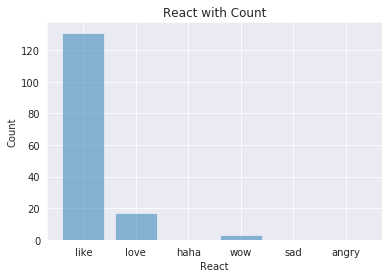

In [67]:
#1.1
##change datatypes of objects
updates_df["dw-reaction-count-like"]= updates_df["dw-reaction-count-like"].astype(int)
updates_df["dw-reaction-count-love"]= updates_df["dw-reaction-count-love"].astype(int)
updates_df["dw-reaction-count-wow"]= updates_df["dw-reaction-count-wow"].astype(int)
updates_df["react_count"]= updates_df.iloc[:,-6:].sum(axis=1)


reacts_sum = pd.DataFrame(updates_df.iloc[:,-7:-1].sum(),columns=["count"])

label = []
for react in reacts_sum.index:
  label.append(react.split("-")[3])

y_pos = np.arange(len(reacts_sum["count"]))

plt.bar(y_pos, reacts_sum["count"], align='center', alpha=0.5)
plt.xticks(y_pos, label)
plt.ylabel('Count')
plt.xlabel('React')
plt.title('React with Count')

plt.show()

In [68]:
#1.2
print("Max number of reacts : "+ str(updates_df["react_count"].max()))
updates_df[updates_df["react_count"]==72]

Max number of reacts : 72


,Unnamed: 0,title,link,country,language,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Unnamed: 0.1,views,dw-reaction-count-like,dw-reaction-count-love,dw-reaction-count-haha,dw-reaction-count-wow,dw-reaction-count-sad,dw-reaction-count-angry,react_count
5,5,Pinoys to get bulk of Japan jobs — Bello,https://www.dole.gov.ph/news/pinoys-to-get-bul...,Japan,en,2019,3,11,17,6,76,False,False,False,False,False,False,1552780800,5,4219613,64,6,0,2,0,0,72


# Analysis 3: Local and Global updates 
1.We remove the filipino version of equivalent english title

- published 1142 local updates 
- published 243 updates about other countries
 
 We can say that majority of the updates are regional, so DOLE is on local updates since there is  Philippines Overseas Employment Administration(POEA) focusing on the overseas updates

In [0]:
#removing the filipino titles with equivalent english title
duplicates= pd.read_csv("/content/filipino_english.csv")
number = 0 
duplicates['Unnamed: 0']=  duplicates['Unnamed: 0'].astype(int)
updates_df = updates_df.drop(duplicates[duplicates['language']=='tl']['Unnamed: 0']).reset_index(drop=True)

In [70]:
#local updates
display(updates_df[updates_df.country=="None"].describe())

for x in updates_df[updates_df.country!="None"].title:
  print(x)


  # o-postitive
  # wanted
  # get job

  #occupation
  #Nurse
  #Caregviers
  
  # Positive
  # return
  # hikes pay 

  # Negative
  # Marriage for jobs (china)
  # warned
  # warns


,Unnamed: 0,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed,Unnamed: 0.1,views,dw-reaction-count-like,dw-reaction-count-love,dw-reaction-count-haha,dw-reaction-count-wow,dw-reaction-count-sad,dw-reaction-count-angry,react_count
count,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1.112000e+03,1112.000000,1.112000e+03,1112.000000,1112.0,1112.0,1112.0,1112.0,1112.0,1112.000000
mean,745.972122,2013.610612,6.232914,25.366906,15.504496,2.188849,173.997302,1.391183e+09,745.972122,4.235925e+06,0.028777,0.0,0.0,0.0,0.0,0.0,0.028777
std,404.417346,2.063439,3.388533,14.806836,8.785471,1.565935,103.615162,6.413307e+07,404.417346,3.075549e+03,0.429639,0.0,0.0,0.0,0.0,0.0,0.429639
min,1.000000,2010.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.280794e+09,1.000000,4.219714e+06,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,397.750000,2012.000000,3.000000,12.000000,8.000000,1.000000,81.000000,1.332871e+09,397.750000,4.236914e+06,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
50%,761.500000,2014.000000,6.000000,24.000000,15.000000,2.000000,166.500000,1.394712e+09,761.500000,4.236955e+06,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
75%,1094.250000,2015.000000,9.000000,38.250000,23.000000,3.250000,265.250000,1.435795e+09,1094.250000,4.236965e+06,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
max,1414.000000,2019.000000,12.000000,53.000000,31.000000,6.000000,364.000000,1.572912e+09,1414.000000,4.236979e+06,13.000000,0.0,0.0,0.0,0.0,0.0,13.000000


More Pinoy nurses wanted in Germany
Charging training fees for Japan interns illegal
Deployment of Pinoy teachers in Thailand soon
Pinoys to get bulk of Japan jobs — Bello
Nurses, caregivers wanted in Japan
Nurses warned on illegal recruitment for Germany
Germany hikes minimum pay of Pinoy nurses
POEA allows return of OFWs to Libya
New law for OFW protection in Canada pushed
OFWs in Qatar to get workers’ fund
Nurses for Germany
POEA warns of ‘marriage-for-job’ racket in China
Qatar grants clemency to 25 OFWs
DOLE warns public: No job order for mushroom pickers in Canada
Oman sinuspinde ang pagbibigay ng visa para sa ilang trabaho
Oman suspends issuance of visas for certain jobs
PH set to seal labor pact with Israel
Japanese firms told to regularize workers
Demand up for foreign workers in Malaysia
OFWs in Guam urged to take ‘necessary precautions’
OFWs sa Guam pinag-iingat
Bello: Mga OFW na apektado ng sunog sa Qatar, tulungan
Assist OFWs affected by fire in Qatar – Bello
DOLE-OWWA fas

In [71]:
global_update = updates_df[updates_df.country!="None"]
display(global_update.describe())
for x in global_update['title']:
     print(x)     



,Unnamed: 0,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed,Unnamed: 0.1,views,dw-reaction-count-like,dw-reaction-count-love,dw-reaction-count-haha,dw-reaction-count-wow,dw-reaction-count-sad,dw-reaction-count-angry,react_count
count,243.000000,243.00000,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02,243.000000,2.430000e+02,243.000000,243.000000,243.0,243.000000,243.0,243.0,243.000000
mean,626.559671,2014.26749,6.061728,24.559671,15.547325,2.246914,168.744856,1.411458e+09,626.559671,4.235733e+06,0.407407,0.069959,0.0,0.012346,0.0,0.0,0.489712
std,370.108248,1.93234,3.388162,14.661171,8.920727,1.609868,102.768861,6.141900e+07,370.108248,3.391043e+03,4.417596,0.802400,0.0,0.143207,0.0,0.0,5.197236
min,0.000000,2010.00000,1.000000,1.000000,1.000000,0.000000,6.000000,1.287014e+09,0.000000,4.219613e+06,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
25%,346.000000,2013.00000,3.000000,12.000000,8.000000,1.000000,79.000000,1.382486e+09,346.000000,4.236914e+06,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
50%,607.000000,2014.00000,6.000000,23.000000,15.000000,2.000000,155.000000,1.410739e+09,607.000000,4.236947e+06,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
75%,872.500000,2015.00000,9.000000,37.500000,23.000000,4.000000,258.500000,1.442534e+09,872.500000,4.236961e+06,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
max,1394.000000,2019.00000,12.000000,52.000000,31.000000,6.000000,364.000000,1.574813e+09,1394.000000,4.236978e+06,64.000000,11.000000,0.0,2.000000,0.0,0.0,72.000000


More Pinoy nurses wanted in Germany
Charging training fees for Japan interns illegal
Deployment of Pinoy teachers in Thailand soon
Pinoys to get bulk of Japan jobs — Bello
Nurses, caregivers wanted in Japan
Nurses warned on illegal recruitment for Germany
Germany hikes minimum pay of Pinoy nurses
POEA allows return of OFWs to Libya
New law for OFW protection in Canada pushed
OFWs in Qatar to get workers’ fund
Nurses for Germany
POEA warns of ‘marriage-for-job’ racket in China
Qatar grants clemency to 25 OFWs
DOLE warns public: No job order for mushroom pickers in Canada
Oman sinuspinde ang pagbibigay ng visa para sa ilang trabaho
Oman suspends issuance of visas for certain jobs
PH set to seal labor pact with Israel
Japanese firms told to regularize workers
Demand up for foreign workers in Malaysia
OFWs in Guam urged to take ‘necessary precautions’
OFWs sa Guam pinag-iingat
Bello: Mga OFW na apektado ng sunog sa Qatar, tulungan
Assist OFWs affected by fire in Qatar – Bello
DOLE-OWWA fas

### Task 2: Create a count vectorizer for the frequency of words in the titles
#### Top 10 Words for the DOLE upadates titles (frequency:word)


**note:** baldoz is the president of the dole 
- 627: dole
- 347: baldoz
- 224: ofws (Overseas Filipino Workers)
- 205: workers
- 183: labor
- 150: region
- 104: sa (filipino stop words indicating where)
- 96: livelihood
- 95: assistance
- 86: wage
- 86: employment
- 82: ofw
- 80: polo
- 80: job
- 77: new
- 73: ng
- 61: poea (Philippines Overseas Employment Administration)
- 60: program
- 60: ncmb (National Conciliation and Mediation Board) 
- 57: city
- 51: settles

Conclusion: The top 20 most common words, are a sign that the updates are mostly composed of the accomplishments of DOLE(assistance, new, program, settles), places(region, city, sa) and employment(labor, ofw, workers, labor, livelihood, wage, job). Additonally there would be some relationship between POEA and ofws, since both are tackling overseas issues.

### Unexpected top words
1. child (rank 23) </br>
  There are 38 article updates regarding child labor, this also shows that child labor is one of the focus of DOLE and it serious problem. DOLE is striving to solve this issue via working with Department of Justice, capaigns and issuance of agreements. 


Text(0.5, 1.0, 'Words with corresponding count')

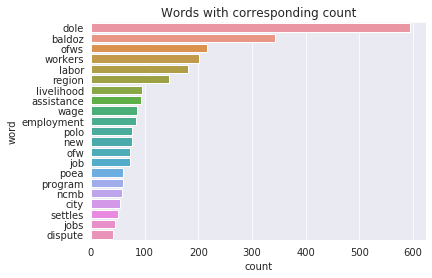

In [72]:
c_vec_dos = CountVectorizer(stop_words="english")
ngrams = c_vec_dos.fit_transform(updates_df['title'].to_list())

vocab = c_vec_dos.vocabulary_
count_values = ngrams.toarray().sum(axis=0)

freq_words = pd.DataFrame(columns = ["word","count"])

count = 0 
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    freq_words.loc[count] = [ng_text,ng_count]
    count +=1


ax = sns.barplot(x="count", y="word", data = freq_words.loc[:20] )
ax.set_title('Words with corresponding count')

In [0]:
find_word = pd.DataFrame(columns=c_vec_dos.get_feature_names(),data = ngrams.toarray())

In [0]:
def search_word(updates,df,search):
  query = updates.iloc[df[df[search]>0].index]
  for x in query['title']:
    print(x)
  print("searched word :" + search +" count: "+str(len( query['title'])))
  print('----------------------------------------------------------------')
  return search, len(query)

In [75]:
df = search_word(updates_df,find_word,"child")

DOLE goes to gold mines to stop child labor
US labor department lauds anti-child labor feat in Region 4A
DOLE, CIDG, DSWD rescue child laborers in Iloilo
Brighter future dawns in Negros Oriental as Baldoz declares six barangays Child Labor-Free
Robinsons Galleria Cebu terminates subcontractor for having no PCAB license and for employing a child laborer
In Cebu, DOLE rescues three child laborers; stops operation at construction site
Baldoz commends 6 newly declared child labor-free barangays in Region 7
Ten more sugar farm child laborers undergo DOLE skills training in Aklan
Baldoz returns to Sagada; declares six barangays free from child labor
DOLE-CAR, first region to have a “three-in-one” labor laws-compliant eco-zone Baguio EPZ claims record of being first Labor Laws Compliant, Child Labor-Free, and productivity-based pay practitioner zone
In Region 3, Baldoz lauds five companies certified as child labor-free
DOLE Region 4-B seeks to graduate 12 “low-hanging” to child labor-free bar

# Analysis 4 : Jobs for filipinos

| rank | job                                |
|------|------------------------------------|
| 1    | Nurse/ Medical Support & Assistant |
| 2    | Food/ Beverage/ Restaurant Service |
| 3    | General Work                       |
| 4    | Engineering                        |
| 5    | Maintenance and repair             |

source: https://www.workabroad.ph/blog/item/207/Top-10-Countries-and-Job-Specializations-for-OFWs-in-2019


Since there is no open data regrading a list of occupation, I manually got occupation from the source mentioned above. As we can see  rank 1 and 3 is the most mentioned ocuupations in the updates title. I say that the article title is not a good basis of in demand for filpinos jobs 

In [76]:
df = search_word(updates_df,find_word,'nurses') # rank 1
df = search_word(updates_df,find_word,'caregivers') # rank 1

#df = search_word(updates_df,find_word,'cook') # rank 2
#df = search_word(updates_df,find_word,'bartender') # rank 2
df = search_word(updates_df,find_word,'domestic') # rank 3


df = search_word(updates_df,find_word,'engineer') # rank 2

# df = search_word(updates_df,find_word,'') # rank 2

More Pinoy nurses wanted in Germany
Nurses, caregivers wanted in Japan
Nurses warned on illegal recruitment for Germany
Germany hikes minimum pay of Pinoy nurses
Nurses for Germany
KSA’s Ministry of Health to hire 200 nurses
Germany needs 200,000 nurses till 2020—Baldoz
30 nurses qualify in Germany under the Philippines-Germany Triple Win Project
POEA Governing Board allows licensed agencies to recruit Filipino nurses for Germany free of placement fee charges
8 more Filipino nurses ready to take Germany’s recognition test
With 739 job openings in UK and Ireland for the first quarter of 2015, Baldoz confident Filipino nurses have what it takes to get hired
Baldoz announces 270 more job openings for Pinoy nurses in UK
In Ireland, foreign placement agency expresses need for 50 Filipino nurses
In the UK, demand for Filipino nurses inches up—Baldoz
UK implements new registration process for non-EU and non-EAA nurses and midwives
In Kuwait, POLO sees demands for nurses and allied medical pro

# Conclusion :
1. Around 4,220,000 have visited the DOLE website and majority read the regional and overseas updates.
2. Only A few people reacted the on regional and overseas updates articles and an explanation would be it was just a recently added feature. However in the future this feature would be a great indicator regarding the sentiment of the article. 
3. Majority of the articles are regarding regional updates, since there is another specific organization to mange overseas labor (POEA). For future work , it would be nice to extend this analysis on the titles of news articles in POEA (http://www.poea.gov.ph/news/newsarchive.html) 
4. Its true that there is much more oppurtunity for Filipinos with nursing and domestic jobs.  
